<a href="https://colab.research.google.com/github/GPINTOC/predicciones-de-ventas-alimenticias/blob/main/Proyecto1parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
filename = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**# 1) ¿Cuántas filas y columnas?**

In [3]:
# Hay 8523 filas y 12 columnas
df.shape

(8523, 12)

**# 2) ¿Cuáles son los tipos de datos en cada variable?**

In [4]:
# Todos los datos están bien asignados a su tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**# 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.**

In [5]:
# No hay duplicados, no elimino.
df.duplicated()
df.duplicated().sum()

0

**# 4) Identifiquen los valores faltantes.**


In [6]:
# Faltan 1463 datos en Item_Weigth y 2410 en Outlet_Size
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**# 5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto 
requiere sus criterios, así que expliquen su elección).**

In [7]:
# PARA ITEM_WEIGHT
# primero filtro el dejando todos los valores NaN de Item Weight
df['Item_Weight'].isna().sum()

1463

In [8]:
# Hago groupby para agrupar item identificador e item peso (el item identificador es por persona, se agrupan y podrian dar el item weight)
weight_nulos = df.groupby('Item_Identifier')['Item_Weight'].mean().round(2)
weight_nulos

Item_Identifier
DRA12    11.60
DRA24    19.35
DRA59     8.27
DRB01     7.39
DRB13     6.12
         ...  
NCZ30     6.59
NCZ41    19.85
NCZ42    10.50
NCZ53     9.60
NCZ54    14.65
Name: Item_Weight, Length: 1559, dtype: float64

In [9]:
# Uso apply para aplicar, me quedan 4 filas vacias despues de aplicado. 
def fill_weight(x):
  if pd.isnull(x['Item_Weight']):
    id = x['Item_Identifier']
    peso = weight_nulos[id]
    if pd.notnull(peso):
      x['Item_Weight'] = peso
  return x

df = df.apply(fill_weight, axis=1)
df['Item_Weight'].isna().sum()

4

In [10]:
# Dado que no existe asociación entre Item_Identifier e Item_Weight y son solo 4 filas, decido borrarlas, no va a alterar el dato final
# Para esto busco el index, de esta forma las elimino directamente
df['Item_Weight'].isna()
df.loc[pd.isna(df["Item_Weight"]), :].index

Int64Index([927, 1922, 4187, 5022], dtype='int64')

In [11]:
# Elimino los index de acuerdo a valores nulos en Item_Weight y compruebo que no quedan mas nulos en ese item
df.drop([927, 1922, 4187, 5022], axis=0, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# PARA OUTLET SIZE
# Hay 2410 datos nulos en este item
df['Outlet_Size'].isna().sum()

2410

In [13]:
# REVISION POR OUTLET TYPE
# Primero decido agrupar por Outlet_Type y Outlet_Size, dando un valor unico a Grocery Store (Small) y a Supermarket Type 2 y 3 (Medium)
df.groupby(['Outlet_Type', 'Outlet_Size'])['Outlet_Location_Type'].count()

Outlet_Type        Outlet_Size
Grocery Store      Small           527
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          932
Name: Outlet_Location_Type, dtype: int64

In [14]:
# Si NaN esta asociado a Grocery Store, se debe llenar con Small
# Si es supermarket type 2 o 3 se debe llenar con medium
# Despues de aplicado, me quedan 1855 nulos en outlet size

def fill_size(x):
  if pd.isnull(x['Outlet_Size']):
    if x ['Outlet_Type']== 'Grocery Store':
      x['Outlet_Size'] = 'Small'
    if x ['Outlet_Type'] in ['Supermarket Type2', 'Supermarket Type3']:
      x['Outlet_Size'] = 'Medium'
  return x

df = df.apply(fill_size, axis=1)
df['Outlet_Size'].isna().sum()

1855

In [15]:
# REVISION POR OUTLET IDENTIFIER
# Segundo decido buscar por asociacion entre Outlet_identifier y Outlet_Size, meentrega que faltan solo dos Outlet_identifier
df[df['Outlet_Size'].isna()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [16]:
# Reviso por Outlet_Location_Type, quedan solo 1855 nulos clasificados solo como Tier 2, eso es la suma exacta de ambos Outlet_identifier
df[df['Outlet_Size'].isna()]['Outlet_Location_Type'].value_counts()

Tier 2    1855
Name: Outlet_Location_Type, dtype: int64

In [17]:
# Evaluo los datos de la columna Outlet_Location_Type en conjunto con Outlet_Size, el outlet size para tier 2 es small
df.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Outlet_Type'].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1457
Tier 2                Small           930
Tier 3                High            932
                      Medium         1860
                      Small           555
Name: Outlet_Type, dtype: int64

In [18]:
#$ Defino funcion, Si outlet size esta nulo, y su location type es tier 2, debe ser rellenado con small

def fill_size2(x):
  if pd.isnull(x['Outlet_Size']):
    if x ['Outlet_Location_Type']== 'Tier 2':
      x['Outlet_Size'] = 'Small'
    
  return x

df = df.apply(fill_size2, axis=1)
df['Outlet_Size'].isna().sum()

0

**# 6) Confirmen que no hay valores faltantes después de abordarlos.**

In [19]:
# Verifico que no hay nulos y que mi base esta limpia
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**# 7) Encuentren y arreglen alguna categoría inconsistente de datos (example: 
fix cat, Cat, and cats so that they are consistent)**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [21]:
# Busco cuáles son las categorias no numéricas y aplico 
for columna in ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']:
  print(columna, '\n')
  print(df[columna].value_counts(), '\n')

Item_Fat_Content 

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type 

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Location_Type 

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type 

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



In [22]:
# detecto que en columna Item_Fat_Content existen varios datos inconsistentes
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# reemplazar los nombres menos comunes con los mas comunes para que queden todos como Low Fat y Regular y corroboro que todos quedaron bien reemplazados con value_counts
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

**# 8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)**

In [24]:
df.describe([]).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8519.00,8519.00,8519.00,8519.00
mean,12.88,0.07,141.01,1997.84,2181.19
std,4.65,0.05,62.28,8.37,1706.51
min,4.56,0.00,31.29,1985.00,33.29
50%,12.65,0.05,143.05,1999.00,1794.33
max,21.35,0.33,266.89,2009.00,13086.96


In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Para la tercera parte: La tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada**:

- Histograma para ver las distribuciones de diversas características en el conjunto de datos.
- Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
- Mapa de calor de la correlación entre las características


**Proyecto 1 - Parte 4 (base): Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas**

Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.
- Aprovechen sus limpiezas, exploraciones y análisis anteriores.
- Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).
- Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.
Comprometan su trabajo en GitHub.
¡Entreguen un enlace a su repositorio de GitHub! Continuaremos trabajando en el proyecto un poco cada semana.

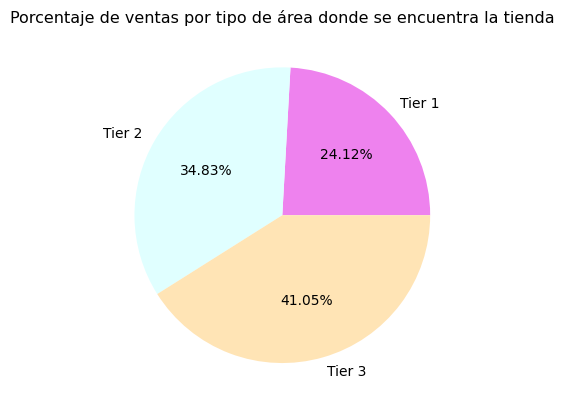

In [26]:
# TORTA
# Tipo de area donde se encuentra la tienda por ganancia obtenida
groupby_location_sales = df.groupby('Outlet_Location_Type')
labels_location_sales = groupby_location_sales.groups.keys()
values_loation_sales = groupby_location_sales['Item_Outlet_Sales'].sum()

plt.figure(dpi=100)
colores = ['violet', 'lightcyan', 'moccasin']
plt.style.use('ggplot')
plt.pie(values_loation_sales, labels = labels_location_sales, autopct = '%.2f%%', colors = colores)
plt.rcParams.update({'font.size': 8})
plt.title('Porcentaje de ventas por tipo de área donde se encuentra la tienda');

En este gráfico de torta, se aprecia que el tipo Tier 3 es el que más vende y el Tier 1 el que menos vende.

Text(0.5, 0, 'Tamaño de la tienda')

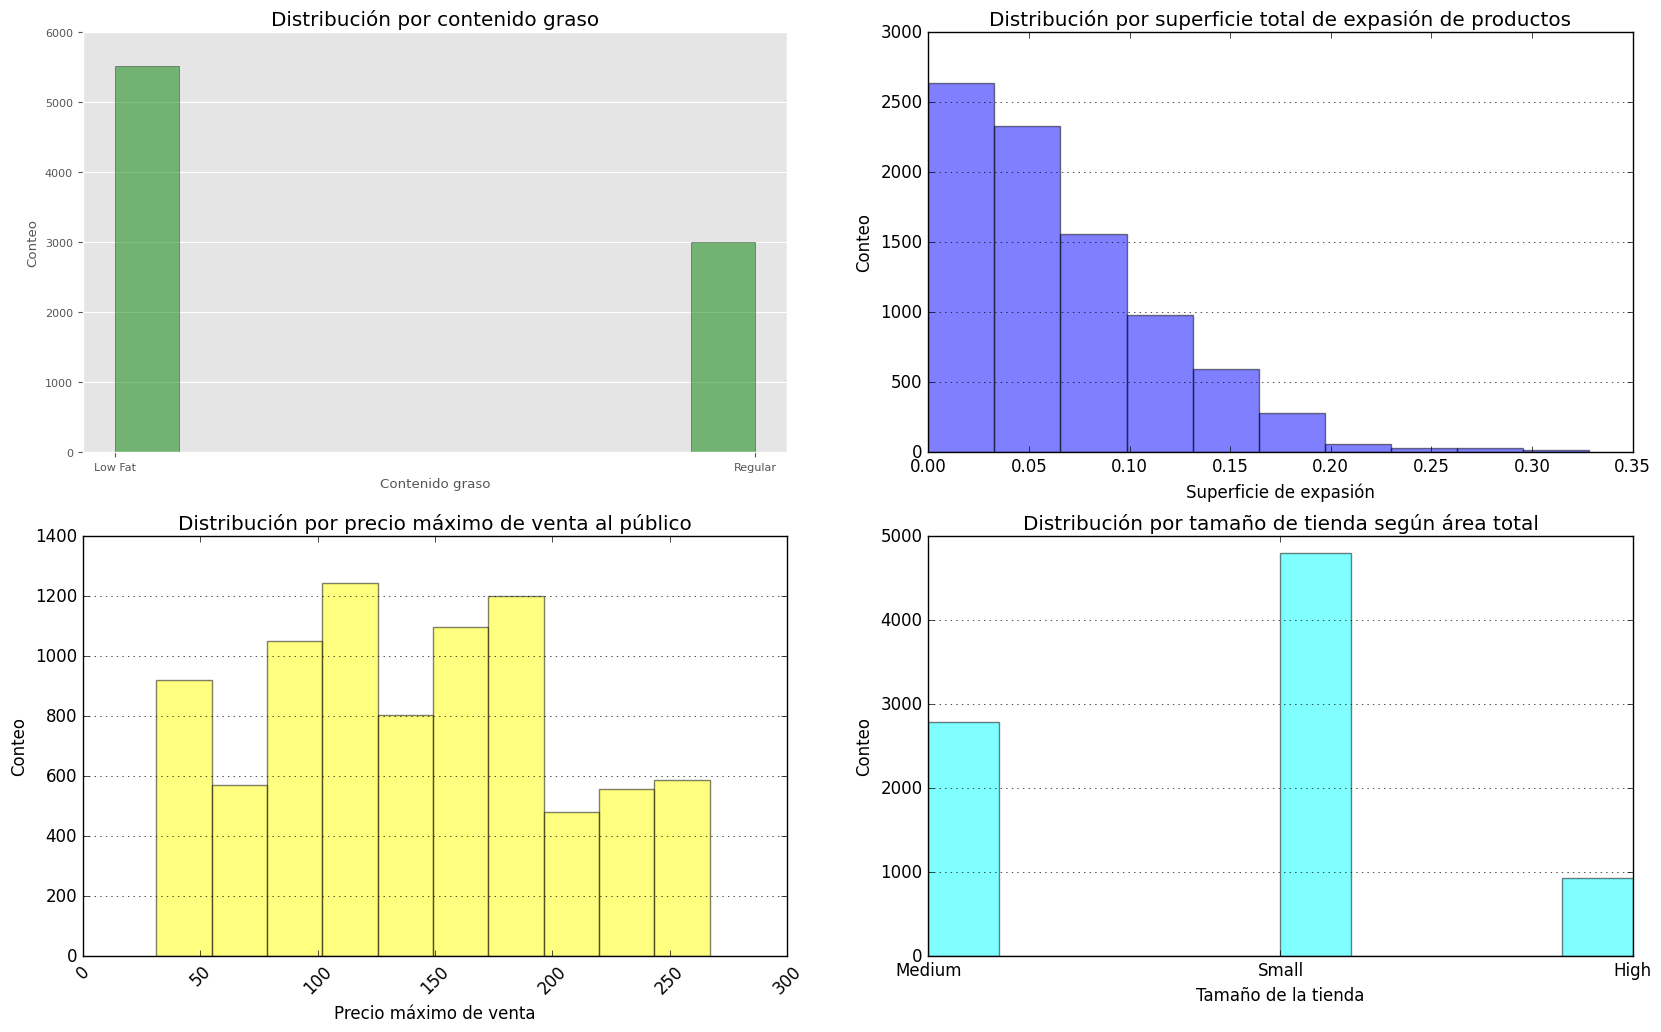

In [27]:
# HISTOGRAMAS CON SUBPLOT
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 1)
df['Item_Fat_Content'].hist(edgecolor = 'black', alpha = 0.5, color = 'green');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por contenido graso')
plt.ylabel('Conteo')
plt.xlabel('Contenido graso')

plt.subplot(2, 2, 2)
df['Item_Visibility'].hist(edgecolor = 'black', alpha = 0.5, color = 'blue');
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por superficie total de expasión de productos')
plt.ylabel('Conteo')
plt.xlabel('Superficie de expasión')

plt.subplot(2, 2, 3)
df['Item_MRP'].hist(edgecolor = 'black', alpha = 0.5, color = 'yellow');
plt.style.use('classic');
plt.xticks(rotation = 45);
plt.grid(axis = 'x')
plt.title('Distribución por precio máximo de venta al público')
plt.ylabel('Conteo')
plt.xlabel('Precio máximo de venta')

plt.subplot(2, 2, 4)
df['Outlet_Size'].hist(edgecolor = 'black', alpha = 0.5, color = 'cyan', bins = 10);
plt.style.use('classic');
plt.grid(axis = 'x')
plt.title('Distribución por tamaño de tienda según área total')
plt.ylabel('Conteo')
plt.xlabel('Tamaño de la tienda')

- Histograma contenido graso: Es más común la venta de productos de bajo contenido graso que de regular contenido graso
- Histograma de distribución por superficie total de expansión de productos asignada al producto: Los de poca superficie dee expansión son mayores que los de mayor superficie
- Histograma distribución por precio máximo de venta al público: Hay una distribución bastantate uniforme en cuanto alprecio de venta, sin embargo, el que más común es en el rango de 100 a 130 
- Histograma distribución de tamaño de tienda según área: el tamaño de la tienda small es el más común de la data, seguido por el medio. El menos frecuente es el grande

Grafico cotenido graso: 

Text(0.5, 1.0, 'Distribución de contenido de grasa por item venta de producto y precio máximo de venta')

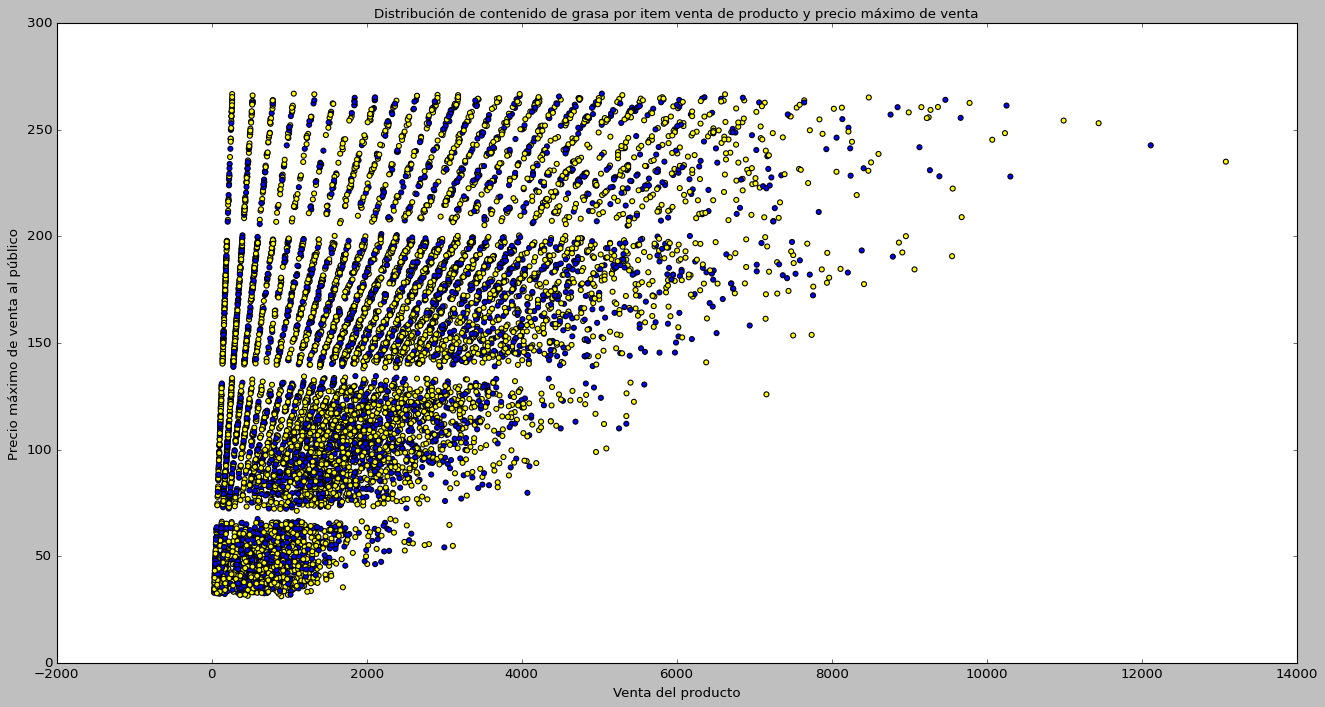

In [28]:
# SCATTER

colors = {'Low Fat':'yellow', 'Regular': 'blue'}
plt.figure(figsize = (20, 10))
plt.scatter(x = df['Item_Outlet_Sales'], y = df['Item_MRP'], c = df['Item_Fat_Content'].map(colors))
plt.rcParams.update({'font.size': 10})
plt.xlabel('Venta del producto')
plt.ylabel('Precio máximo de venta al público')
plt.title('Distribución de contenido de grasa por item venta de producto y precio máximo de venta')

- No hay relacion con la venta y el contenido grasa ya que la distribucion es uniforme
- Los productos de menor precio máximo de venta al público tienen una menor ganancia , mientras que la los productos que tienen mayor precio de venta al público tienen mayor ganancia.



In [29]:
# MAPA DE CALOR 
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009174,0.025977,-0.013436,0.013171
Item_Visibility,-0.009174,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025977,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013436,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013171,-0.128297,0.567803,-0.049083,1.000000


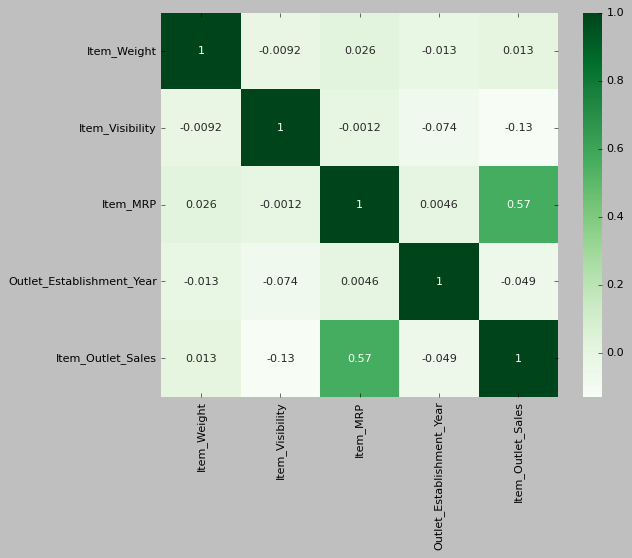

In [30]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

En este caso, se demuestra que en el grupo de estudio, la única correlación moderada se encuentra entre las variables Item Outlet Size (El tamaño de la tienda en cuanto al área total) e Item MRP (Precio máximo de venta al público (precio de catálogo) del producto).

En el caso de la correlación negativa, se demuestra que la relación es inversamente proporcional entre varios de los item que presentan números negativos. 

No es posible encontrar correlación entre las demás variables. 



[Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'High')]

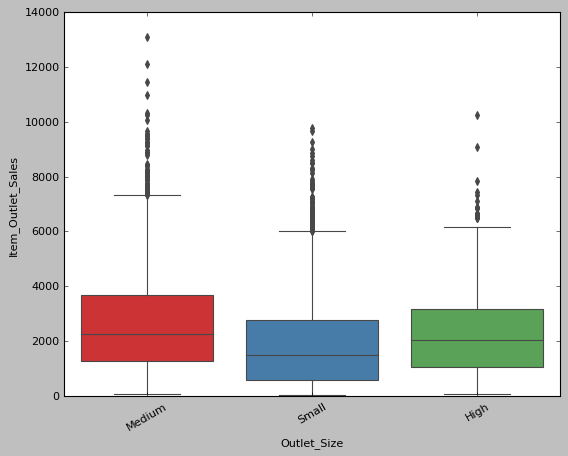

In [31]:
# BOXPLOTS
ax = sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Lo primero que se puede apreciar en estos boxplots es que todos los tamaños de outlet size tienen valores outlier.
En los 3 casos, los rangos intercuartiles se topan entre ellos y se aprecia que las distribuciones son uniformes de acuerdo al ancho de los cuadrados que se parecen entre ellos. 

In [54]:
# Fuente: https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values
gb_mrp_range = df.groupby(pd.cut(df['Item_MRP'], np.arange(0, 270, 20)))['Item_Outlet_Sales'].sum()
pd.cut(df['Item_MRP'], np.arange(0, 270, 20)).cat.codes

0       12
1        2
2        7
3        9
4        2
        ..
8518    10
8519     5
8520     4
8521     5
8522     3
Length: 8519, dtype: int8

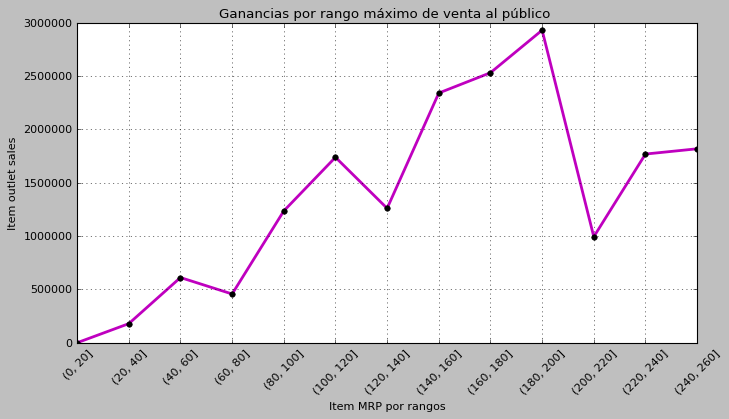

In [88]:
plt.figure(figsize=(10,5))
plt.plot(range(len(gb_mrp_range.index)), gb_mrp_range.values, 'mo-', lw = 2.5, ms = 5, markerfacecolor = 'black')
plt.xticks(range(len(gb_mrp_range.index)), labels=gb_mrp_range.index.values, rotation=45);
plt.title('Ganancias por rango máximo de venta al público ')
plt.ylabel('Item outlet sales')
plt.xlabel('Item MRP por rangos')
plt.grid('x')
plt.show();

En este gráfico de líneas en el que el eje x representa rangos de precios máximos de venta al público, se aprecia que el quemejor venta de producto tiene es el que vende en el rango de 180 a 200, mientras que el que presenta menor ganancia es el que vende en el rango de 20 a 40.